In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import mord
import itertools
import vbmfa.fa as vbfa


import matplotlib.pyplot as plt
import seaborn as sns
from plot_confusion import *
import matplotlib.cm as plt_cm
import matplotlib.colors as plt_col
import matplotlib.patches as plt_patches

In [2]:
def plot_scatter(x, classes, ax=None):
    ax = plt.gca() if ax is None else ax
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=np.min(classes), vmax=np.max(classes))
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(classes)
    ax.scatter(x[0, :], x[1, :], color=colors, s=20)
         
def plot_mse(mse):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(mse, linewidth=2, marker='s',markersize=5, markerfacecolor='red')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('MSE')
    
def plot_grid(n, ncols=4, size=(5, 5)):
    nrows = int(np.ceil(n/float(ncols)))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(size[0]*ncols, size[1]*nrows))
    ax = ax.ravel()
    return [fig, ax]

def plot_grid(n, ncols=4, size=(5, 5)):
    nrows = int(np.ceil(n/float(ncols)))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(size[0]*ncols, size[1]*nrows))
    ax = ax.ravel()
    return [fig, ax]
    
def plot_compress(q, n=30):
    np.random.seed(0)
    fa = vbfa.VbFa(data_y, q)
    fa.fit()
    y = fa.x_to_y()
    fig, ax = plot_grid(n, ncols=10)
    dim = int(np.sqrt(fa.P))
    for i in range(n):
        ax[i].matshow(y[:, i].reshape(dim, dim), cmap='binary')
        
def plot_images(images, n=30, size=2):
    fig, ax = plot_grid(n, ncols=10, size=(size, size))
    dim = int(np.sqrt(images.shape[0]))
    with sns.axes_style('white'):
        for i in range(n):
            ax[i].grid()
            ax[i].set_axis_off()
            ax[i].matshow(images[:, i].reshape(dim, dim), cmap='binary')
        
def plot_ve(ve):
    x = np.arange(len(ve))
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.set_xlabel('Factor')
    ax.set_ylabel('% Variance explained')
    ax.bar(x, ve)

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
music = df.iloc[:,:19]
movies = df.iloc[:,19:31]
interests = df.iloc[:,31:63]
personality = df.iloc[:,63:]
data = {'music':music,'movies':movies,'interests':interests,'personality':personality}

In [64]:
observables = df.iloc[:,:63]

In [65]:
observables.columns

Index([u'Music', u'Slow songs or fast songs', u'Dance', u'Folk', u'Country',
       u'Classical music', u'Musical', u'Pop', u'Rock', u'Metal or Hardrock',
       u'Punk', u'Hiphop, Rap', u'Reggae, Ska', u'Swing, Jazz', u'Rock n roll',
       u'Alternative', u'Latino', u'Techno, Trance', u'Opera', u'Movies',
       u'Horror', u'Thriller', u'Comedy', u'Romantic', u'Sci-fi', u'War',
       u'Fantasy/Fairy tales', u'Animated', u'Documentary', u'Western',
       u'Action', u'History', u'Psychology', u'Politics', u'Mathematics',
       u'Physics', u'Internet', u'PC', u'Economy Management', u'Biology',
       u'Chemistry', u'Reading', u'Geography', u'Foreign languages',
       u'Medicine', u'Law', u'Cars', u'Art exhibitions', u'Religion',
       u'Countryside, outdoors', u'Dancing', u'Musical instruments',
       u'Writing', u'Passive sport', u'Active sport', u'Gardening',
       u'Celebrities', u'Shopping', u'Science and technology', u'Theatre',
       u'Fun with friends', u'Adrenaline sport

# VFA for Personality

In [38]:
np.random.seed(0)
data_y = personality.T.values
fa = vbfa.VbFa(data_y, 2)
mse = [fa.mse()]

In [39]:
fa.q_x.mean[0].shape

(707,)

In [40]:
data_y[1].shape

(707,)

MSE: 207.801485


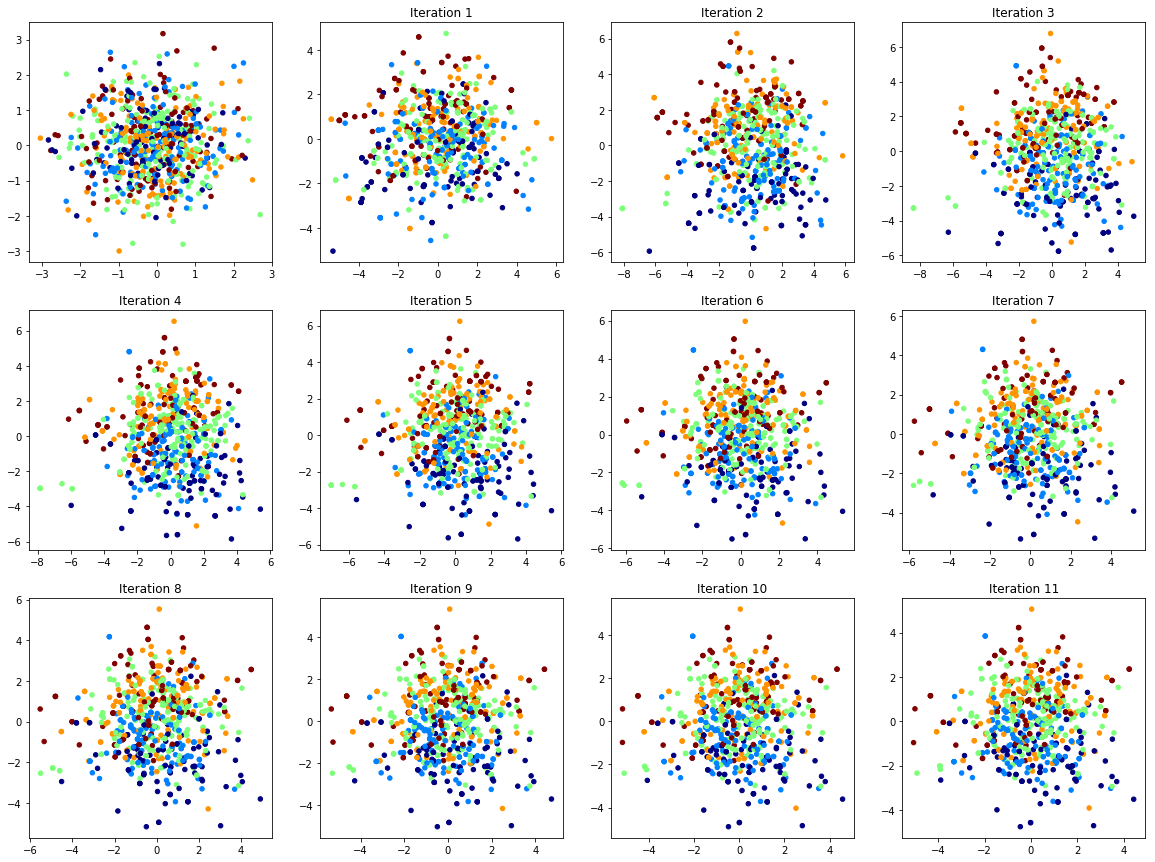

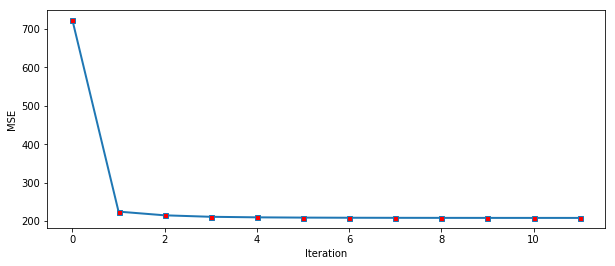

In [41]:

maxit = 11
fig, ax = plot_grid(maxit + 1)
plot_scatter(fa.q_x.mean, personality['Workaholism'], ax[0])
fa.init()
for i in range(maxit):
    fa.update()
    j = i + 1
    plot_scatter(fa.q_x.mean, personality['Workaholism'], ax[j])
    ax[j].set_title('Iteration {}'.format(j))
    mse.append(fa.mse())
plot_mse(mse)
print('MSE: {:f}'.format(mse[-1]))


# VFA for Observables

In [50]:
def plot_iter(model,segments,maxit=7):
    fig, ax = plot_grid(maxit + 1)
    plot_scatter(model.q_x.mean, segments, ax[0])
    model.init()
    for i in range(maxit):
        model.update()
        j = i + 1
        plot_scatter(model.q_x.mean, segments, ax[j])
        ax[j].set_title('Iteration {}'.format(j))
        mse.append(model.mse())
    plot_mse(mse)
    print('MSE: {:f}'.format(mse[-1]))


In [60]:
data['music'].columns

Index([u'Music', u'Slow songs or fast songs', u'Dance', u'Folk', u'Country',
       u'Classical music', u'Musical', u'Pop', u'Rock', u'Metal or Hardrock',
       u'Punk', u'Hiphop, Rap', u'Reggae, Ska', u'Swing, Jazz', u'Rock n roll',
       u'Alternative', u'Latino', u'Techno, Trance', u'Opera'],
      dtype='object')

MSE: 109.702762


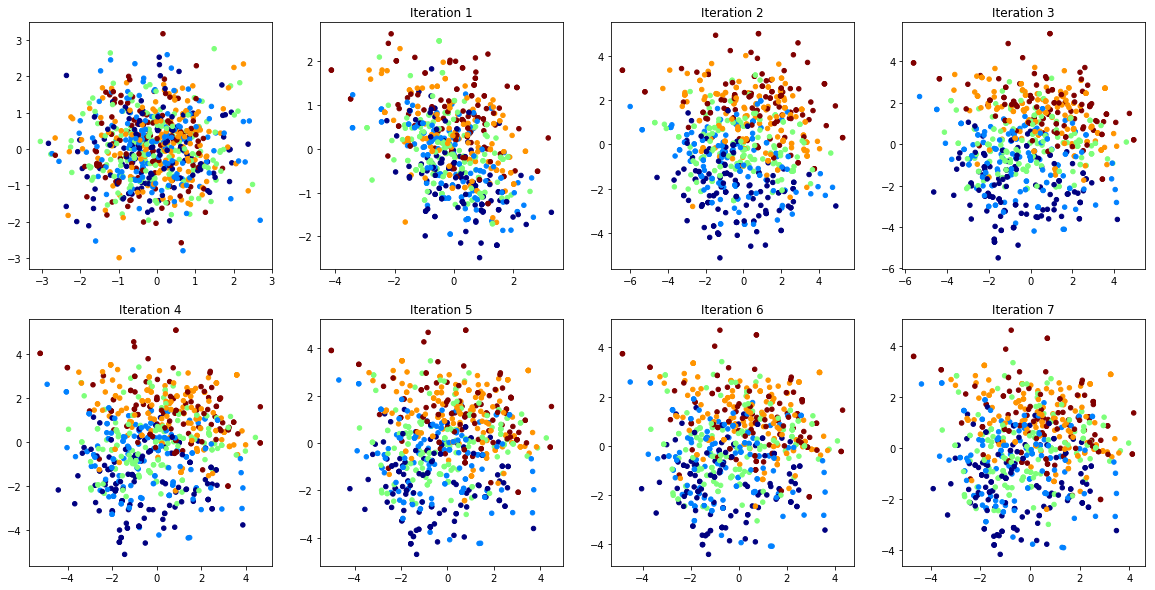

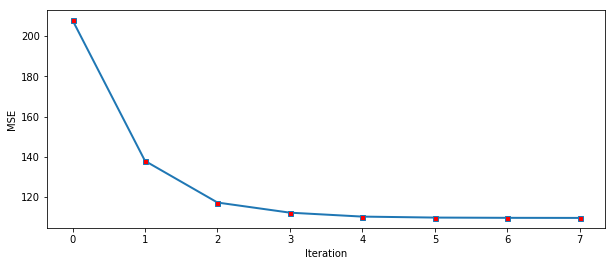

In [55]:
np.random.seed(0)
fa_music = vbfa.VbFa(data['music'].values.T, 2)
mse = [fa.mse()]
plot_iter(fa_music,data['music']['Hiphop, Rap'])

MSE: 82.019070


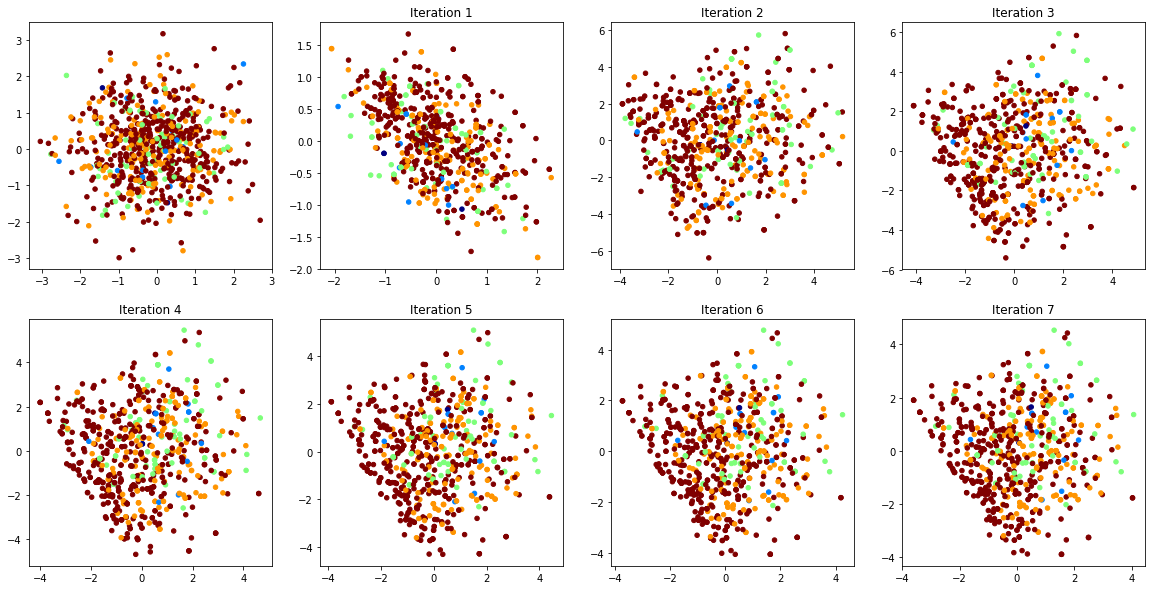

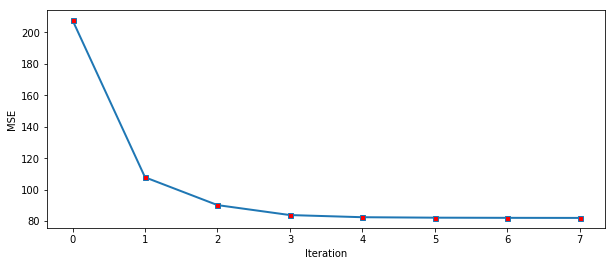

In [66]:
np.random.seed(0)
fa_movies = vbfa.VbFa(data['movies'].values.T, 2)
mse = [fa.mse()]
plot_iter(fa_movies,data['movies']['Comedy'])

# Plot personality features fitted on Observables

In [67]:
personality.columns

Index([u'Daily events', u'Prioritising workload', u'Writing notes',
       u'Workaholism', u'Thinking ahead', u'Final judgement', u'Reliability',
       u'Keeping promises', u'Loss of interest', u'Friends versus money',
       u'Funniness', u'Fake', u'Criminal damage', u'Decision making',
       u'Elections', u'Self-criticism', u'Judgment calls', u'Hypochondria',
       u'Empathy', u'Eating to survive', u'Giving', u'Compassion to animals',
       u'Borrowed stuff', u'Loneliness', u'Cheating in school', u'Health',
       u'Changing the past', u'God', u'Dreams', u'Charity',
       u'Number of friends', u'Waiting', u'New environment', u'Mood swings',
       u'Appearence and gestures', u'Socializing', u'Achievements',
       u'Responding to a serious letter', u'Children', u'Assertiveness',
       u'Getting angry', u'Knowing the right people', u'Public speaking',
       u'Unpopularity', u'Life struggles', u'Happiness in life',
       u'Energy levels', u'Small - big dogs', u'Personality',
  

MSE: 109.702762
Fit on Music, Plot Empathy


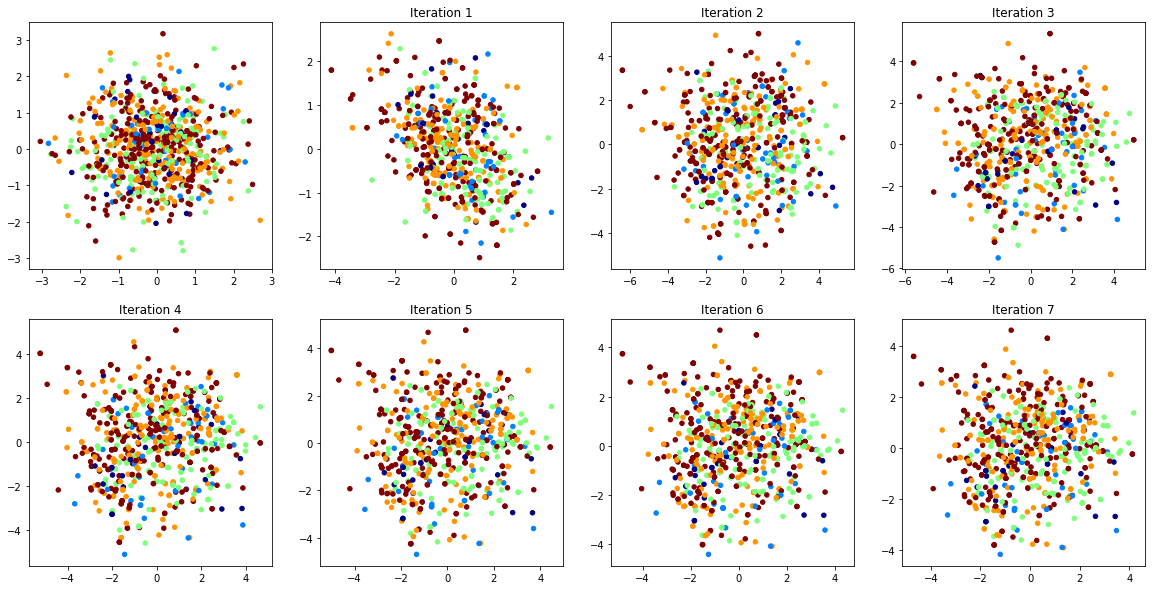

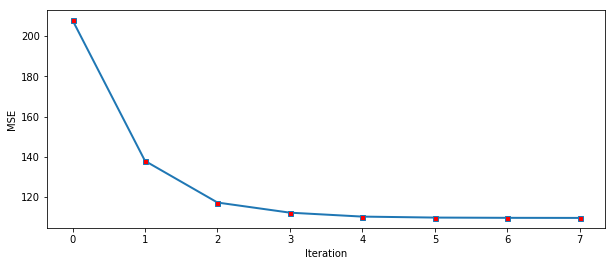

In [80]:
np.random.seed(0)
fa_obs = vbfa.VbFa(music.values.T, 2)
mse = [fa.mse()]
plot_iter(fa_obs,personality['Empathy'])
print('Fit on Music, Plot Empathy')

MSE: 171.243633
Fit on Interests, Plot Getting up


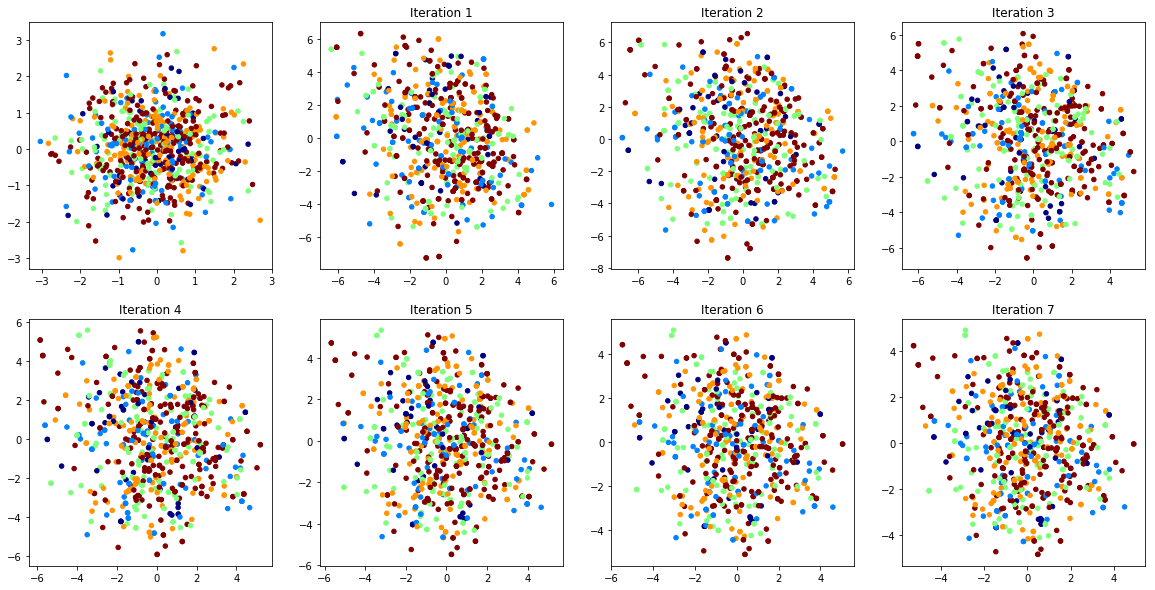

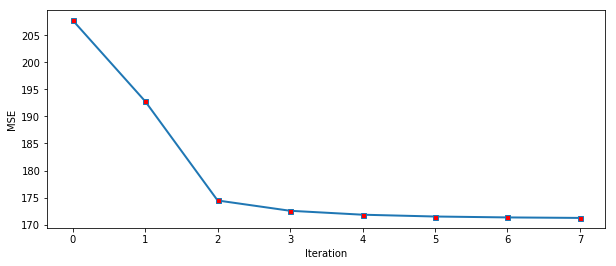

In [82]:
np.random.seed(0)
fa_obs = vbfa.VbFa(interests.values.T, 2)
mse = [fa.mse()]
plot_iter(fa_obs,personality['Getting up'])
print('Fit on Interests, Plot Getting up')

# ordinal regression

In [99]:
fa_obs = vbfa.VbFa(observables.values.T, 10)
fa_obs.fit()

10

In [100]:
fa_obs.q_x.mean.shape

(10, 707)

In [101]:
personality.columns

Index([u'Daily events', u'Prioritising workload', u'Writing notes',
       u'Workaholism', u'Thinking ahead', u'Final judgement', u'Reliability',
       u'Keeping promises', u'Loss of interest', u'Friends versus money',
       u'Funniness', u'Fake', u'Criminal damage', u'Decision making',
       u'Elections', u'Self-criticism', u'Judgment calls', u'Hypochondria',
       u'Empathy', u'Eating to survive', u'Giving', u'Compassion to animals',
       u'Borrowed stuff', u'Loneliness', u'Cheating in school', u'Health',
       u'Changing the past', u'God', u'Dreams', u'Charity',
       u'Number of friends', u'Waiting', u'New environment', u'Mood swings',
       u'Appearence and gestures', u'Socializing', u'Achievements',
       u'Responding to a serious letter', u'Children', u'Assertiveness',
       u'Getting angry', u'Knowing the right people', u'Public speaking',
       u'Unpopularity', u'Life struggles', u'Happiness in life',
       u'Energy levels', u'Small - big dogs', u'Personality',
  

In [108]:
#pip intall mord

y_true = personality['Loneliness'].values.astype(int)
x_fit = fa_obs.q_x.mean.T


Confusion matrix, without normalization
[[  0   8  66   0   0]
 [  0  19 176   0   0]
 [  0  21 248   0   0]
 [  0   5 106   0   0]
 [  0   1  57   0   0]]


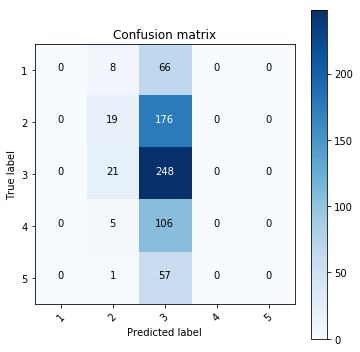

In [109]:
ord_logit = mord.LogisticIT(alpha=1.0)
ord_logit.fit(X = x_fit, y = y_true )

y_pred = ord_logit.predict(x_fit)

plot_confusion_matrix( confusion_matrix( y_true , y_pred ) , classes=[1,2,3,4,5] ,size = 5)